# Estrategia RSI

## Autor: Lucía Saiz Lapique

__Examen__

__Gestión de Activos y Carteras__

__CUNEF__

A diferencia de las anteriores esta estrategia trata de reconocer señales de cambios de
tendencia. La estrategia de inversión es totalmente diferente: intentamos comprar nuestro
activo cuanto más barato esté y venderlo más caro.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
datos = pd.read_excel('datos_examen.xlsx', sheet_name = 'Precios')
datos = datos.set_index('Date')
observacion = datos.index >= dt.datetime(2015, 4, 14)
datos = datos[(observacion)]
datos

,DOW JONES,Japanese Bond,DKK-EUR X-RATE,CAD-USD X-RATE,DKK DEPOSIT,CAD DEPOSIT,Oro,EUR_USD
Date,,,,,,,,
2015-04-14,18036.70,147.87,0.1339,0.8010,-0.245,0.855,1192.78,1.0655
2015-04-15,18112.61,147.85,0.1339,0.8137,-0.245,0.955,1202.58,1.0684
2015-04-16,18105.77,147.80,0.1340,0.8205,-0.255,1.250,1198.55,1.0761
2015-04-17,17826.30,148.00,0.1340,0.8167,-0.285,1.250,1204.22,1.0806
2015-04-20,18034.93,147.93,0.1340,0.8179,-0.275,1.260,1195.89,1.0738
...,...,...,...,...,...,...,...,...
2020-04-27,24133.78,152.82,0.1341,0.7125,-0.635,0.770,1713.99,1.0829
2020-04-28,24101.55,152.84,0.1341,0.7144,-0.135,0.785,1707.79,1.0820
2020-04-29,24633.86,152.84,0.1341,0.7205,-0.635,0.780,1713.41,1.0873


In [3]:
datos_mr = datos[['DOW JONES', 'Japanese Bond', 'Oro', 'EUR_USD']]
datos_mr = datos_mr.iloc[:,:-1].div(datos_mr.EUR_USD, axis=0)
datos_mr

,DOW JONES,Japanese Bond,Oro
Date,,,
2015-04-14,16927.921164,138.779916,1119.455655
2015-04-15,16953.023212,138.384500,1125.589667
2015-04-16,16825.360097,137.347830,1113.790540
2015-04-17,16496.668517,136.960948,1114.399408
2015-04-20,16795.427454,137.763084,1113.699013
...,...,...,...
2020-04-27,22286.249885,141.121064,1582.777726
2020-04-28,22275.000000,141.256932,1578.364140
2020-04-29,22655.991907,140.568380,1575.839235


In [4]:
rentab = datos_mr.pct_change().dropna()
rentab

,DOW JONES,Japanese Bond,Oro
Date,,,
2015-04-15,0.001483,-0.002849,0.005479
2015-04-16,-0.007530,-0.007491,-0.010483
2015-04-17,-0.019535,-0.002817,0.000547
2015-04-20,0.018110,0.005857,-0.000628
2015-04-21,-0.004547,0.000186,0.005639
...,...,...,...
2020-04-27,0.014517,0.000166,-0.009574
2020-04-28,-0.000505,0.000963,-0.002789
2020-04-29,0.017104,-0.004874,-0.001600


In [5]:
dow = pd.DataFrame(datos['DOW JONES'])

En primer lugar, se pretende construir el índice RSI.

In [6]:
dow['Diferencia'] = dow['DOW JONES'].diff()
dow['Ganancia'] = np.where(dow['Diferencia'] > 0, dow['Diferencia'], 0)
dow['Pérdida'] = np.where(dow['Diferencia'] < 0, -dow['Diferencia'], 0)

In [7]:
dow['Media Gan'] = dow.Ganancia.rolling(window=14).mean()
dow['Media Perd'] = dow.Pérdida.rolling(window=14).mean()
dow['RS'] = dow['Media Gan']/dow['Media Perd']
dow = dow.dropna()
dow

,DOW JONES,Diferencia,Ganancia,Pérdida,Media Gan,Media Perd,RS
Date,,,,,,,
2015-05-01,18024.06,183.54,183.54,0.00,47.914286,48.817143,0.981505
2015-05-04,18070.40,46.34,46.34,0.00,51.224286,48.817143,1.049309
2015-05-05,17928.20,-142.20,0.00,142.20,45.802143,58.974286,0.776646
2015-05-06,17841.98,-86.22,0.00,86.22,45.802143,64.644286,0.708526
2015-05-07,17924.06,82.08,82.08,0.00,51.665000,44.682143,1.156278
...,...,...,...,...,...,...,...
2020-04-27,24133.78,358.51,358.51,0.00,248.395714,144.553571,1.718364
2020-04-28,24101.55,-32.23,0.00,32.23,248.395714,144.989286,1.713200
2020-04-29,24633.86,532.31,532.31,0.00,230.724286,144.989286,1.591320


A partir de este índice, construiremos la señal; si se encuentra entre 30 y 70 nos mantenemos
neutral, si al día siguiente nos situamos por debajo de 30 compramos y por encima de 70 al
día siguiente vendemos.

In [8]:
señales = pd.DataFrame()
señales['RSI 14'] = np.where(dow['RS'] == 0, 100, 100/(1+dow['RS']))
señales['Señal_dow'] = np.where(señales['RSI 14'] < 30, 1, (np.where(señales['RSI 14'] > 70, -1, 0)))
señales = señales.set_index(dow.index)
señales

,RSI 14,Señal_dow
Date,,
2015-05-01,50.466682,0
2015-05-04,48.796927,0
2015-05-05,56.285833,0
2015-05-06,58.529992,0
2015-05-07,46.376199,0
...,...,...
2020-04-27,36.786826,0
2020-04-28,36.856841,0
2020-04-29,38.590378,0


In [9]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]

In [10]:
dow['Rev Mean_Renta Variable'] = 100
for i in range(1, len(dow)):
    dow['Rev Mean_Renta Variable'].iloc[i] = dow['Rev Mean_Renta Variable'].iloc[i-1]*(1+señales['Señal_dow'].iloc[i]*rentab['DOW JONES'].iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
dow

,DOW JONES,Diferencia,Ganancia,Pérdida,Media Gan,Media Perd,RS,Rev Mean_Renta Variable
Date,,,,,,,,
2015-05-01,18024.06,183.54,183.54,0.00,47.914286,48.817143,0.981505,100.000000
2015-05-04,18070.40,46.34,46.34,0.00,51.224286,48.817143,1.049309,100.000000
2015-05-05,17928.20,-142.20,0.00,142.20,45.802143,58.974286,0.776646,100.000000
2015-05-06,17841.98,-86.22,0.00,86.22,45.802143,64.644286,0.708526,100.000000
2015-05-07,17924.06,82.08,82.08,0.00,51.665000,44.682143,1.156278,100.000000
...,...,...,...,...,...,...,...,...
2020-04-27,24133.78,358.51,358.51,0.00,248.395714,144.553571,1.718364,617.978837
2020-04-28,24101.55,-32.23,0.00,32.23,248.395714,144.989286,1.713200,617.978837
2020-04-29,24633.86,532.31,532.31,0.00,230.724286,144.989286,1.591320,617.978837


## Renta Fija

In [12]:
bono = pd.DataFrame(datos['Japanese Bond'])

In [13]:
bono['Diferencia'] = bono['Japanese Bond'].diff()
bono['Ganancia'] = np.where(bono['Diferencia'] > 0, bono['Diferencia'], 0)
bono['Pérdida'] = np.where(bono['Diferencia'] < 0, -bono['Diferencia'], 0)

In [14]:
bono['Media Gan'] = bono.Ganancia.rolling(window=14).mean()
bono['Media Perd'] = bono.Pérdida.rolling(window=14).mean()
bono['RS'] = bono['Media Gan']/bono['Media Perd']
bono = bono.dropna()
bono.head()

,Japanese Bond,Diferencia,Ganancia,Pérdida,Media Gan,Media Perd,RS
Date,,,,,,,
2015-05-01,147.50,-0.39,0.0,0.39,0.045000,0.071429,0.630000
2015-05-04,147.50,0.00,0.0,0.00,0.045000,0.071429,0.630000
2015-05-05,147.50,0.00,0.0,0.00,0.045000,0.070000,0.642857
2015-05-06,147.50,0.00,0.0,0.00,0.045000,0.066429,0.677419
2015-05-07,146.77,-0.73,0.0,0.73,0.030714,0.118571,0.259036


A partir de este índice, construiremos la señal; si se encuentra entre 30 y 70 nos mantenemos
neutral, si al día siguiente nos situamos por debajo de 30 compramos y por encima de 70 al
día siguiente vendemos.

In [15]:
señales = pd.DataFrame()
señales['RSI 14'] = np.where(bono['RS'] == 0, 100, 100/(1+bono['RS']))
señales['Señal_Bono'] = np.where(señales['RSI 14'] < 30, 1, (np.where(señales['RSI 14'] > 70, -1, 0)))
señales = señales.set_index(bono.index)
señales

,RSI 14,Señal_Bono
Date,,
2015-05-01,61.349693,0
2015-05-04,61.349693,0
2015-05-05,60.869565,0
2015-05-06,59.615385,0
2015-05-07,79.425837,-1
...,...,...
2020-04-27,29.299363,1
2020-04-28,29.870130,1
2020-04-29,27.027027,1


In [16]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]

In [17]:
bono['Rev Mean_Renta Fija'] = 100
for i in range(1, len(bono)):
    bono['Rev Mean_Renta Fija'].iloc[i] = bono['Rev Mean_Renta Fija'].iloc[i-1]*(1+señales['Señal_Bono'].iloc[i]*rentab['Japanese Bond'].iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
bono

,Japanese Bond,Diferencia,Ganancia,Pérdida,Media Gan,Media Perd,RS,Rev Mean_Renta Fija
Date,,,,,,,,
2015-05-01,147.50,-0.39,0.00,0.39,0.045000,0.071429,0.630000,100.000000
2015-05-04,147.50,0.00,0.00,0.00,0.045000,0.071429,0.630000,100.000000
2015-05-05,147.50,0.00,0.00,0.00,0.045000,0.070000,0.642857,100.000000
2015-05-06,147.50,0.00,0.00,0.00,0.045000,0.066429,0.677419,100.000000
2015-05-07,146.77,-0.73,0.00,0.73,0.030714,0.118571,0.259036,99.788391
...,...,...,...,...,...,...,...,...
2020-04-27,152.82,0.11,0.11,0.00,0.079286,0.032857,2.413043,106.073940
2020-04-28,152.84,0.02,0.02,0.00,0.077143,0.032857,2.347826,106.176065
2020-04-29,152.84,0.00,0.00,0.00,0.077143,0.028571,2.700000,105.658514


## Materia Prima: Petróleo

In [19]:
Oro = pd.DataFrame(datos['Oro'])

In [20]:
Oro['Diferencia'] = Oro['Oro'].diff()
Oro['Ganancia'] = np.where(Oro['Diferencia'] > 0, Oro['Diferencia'], 0)
Oro['Pérdida'] = np.where(Oro['Diferencia'] < 0, -Oro['Diferencia'], 0)

In [21]:
Oro['Media Gan'] = Oro.Ganancia.rolling(window=14).mean()
Oro['Media Perd'] = Oro.Pérdida.rolling(window=14).mean()
Oro['RS'] = Oro['Media Gan']/Oro['Media Perd']
Oro = Oro.dropna()
Oro.head()

,Oro,Diferencia,Ganancia,Pérdida,Media Gan,Media Perd,RS
Date,,,,,,,
2015-05-01,1178.46,-5.91,0.00,5.91,4.428571,5.451429,0.812369
2015-05-04,1188.33,9.87,9.87,0.00,5.133571,5.451429,0.941693
2015-05-05,1193.34,5.01,5.01,0.00,4.791429,5.451429,0.878931
2015-05-06,1192.24,-1.10,0.00,1.10,4.791429,5.242143,0.914021
2015-05-07,1184.51,-7.73,0.00,7.73,4.386429,5.794286,0.757027


A partir de este índice, construiremos la señal; si se encuentra entre 30 y 70 nos mantenemos
neutral, si al día siguiente nos situamos por debajo de 30 compramos y por encima de 70 al
día siguiente vendemos.

In [22]:
señales = pd.DataFrame()
señales['RSI 14'] = np.where(Oro['RS'] == 0, 100, 100/(1+Oro['RS']))
señales['Señal_Oro'] = np.where(señales['RSI 14'] < 30, 1, (np.where(señales['RSI 14'] > 70, -1, 0)))
señales.index = Oro.index
señales

,RSI 14,Señal_Oro
Date,,
2015-05-01,55.176403,0
2015-05-04,51.501451,0
2015-05-05,53.221757,0
2015-05-06,52.246031,0
2015-05-07,56.914334,0
...,...,...
2020-04-27,38.178899,0
2020-04-28,36.172368,0
2020-04-29,34.797740,0


In [23]:
observacion2 = rentab.index >= dt.datetime(2015, 5, 1)
rentab = rentab[(observacion2)]

In [24]:
Oro['Rev Mean_Materia Prima'] = 100
for i in range(1, len(Oro)):
    Oro['Rev Mean_Materia Prima'].iloc[i] = Oro['Rev Mean_Materia Prima'].iloc[i-1]*(1+señales['Señal_Oro'].iloc[i]*rentab['Oro'].iloc[i])

C:\Users\Luli\Documents\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
Oro

,Oro,Diferencia,Ganancia,Pérdida,Media Gan,Media Perd,RS,Rev Mean_Materia Prima
Date,,,,,,,,
2015-05-01,1178.46,-5.91,0.00,5.91,4.428571,5.451429,0.812369,100.000000
2015-05-04,1188.33,9.87,9.87,0.00,5.133571,5.451429,0.941693,100.000000
2015-05-05,1193.34,5.01,5.01,0.00,4.791429,5.451429,0.878931,100.000000
2015-05-06,1192.24,-1.10,0.00,1.10,4.791429,5.242143,0.914021,100.000000
2015-05-07,1184.51,-7.73,0.00,7.73,4.386429,5.794286,0.757027,100.000000
...,...,...,...,...,...,...,...,...
2020-04-27,1713.99,-15.61,0.00,15.61,9.902857,6.115714,1.619248,208.540261
2020-04-28,1707.79,-6.20,0.00,6.20,9.902857,5.612143,1.764541,208.540261
2020-04-29,1713.41,5.62,5.62,0.00,10.304286,5.499286,1.873750,208.540261


In [26]:
Estrategia_Mean = pd.DataFrame(dow['Rev Mean_Renta Variable'])
Estrategia_Mean['Rev Mean_Materia Prima'] = Oro['Rev Mean_Materia Prima']
Estrategia_Mean['Rev Mean_Renta Fija'] = bono['Rev Mean_Renta Fija']
Estrategia_Mean.head()

,Rev Mean_Renta Variable,Rev Mean_Materia Prima,Rev Mean_Renta Fija
Date,,,
2015-05-01,100.0,100.0,100.000000
2015-05-04,100.0,100.0,100.000000
2015-05-05,100.0,100.0,100.000000
2015-05-06,100.0,100.0,100.000000
2015-05-07,100.0,100.0,99.788391


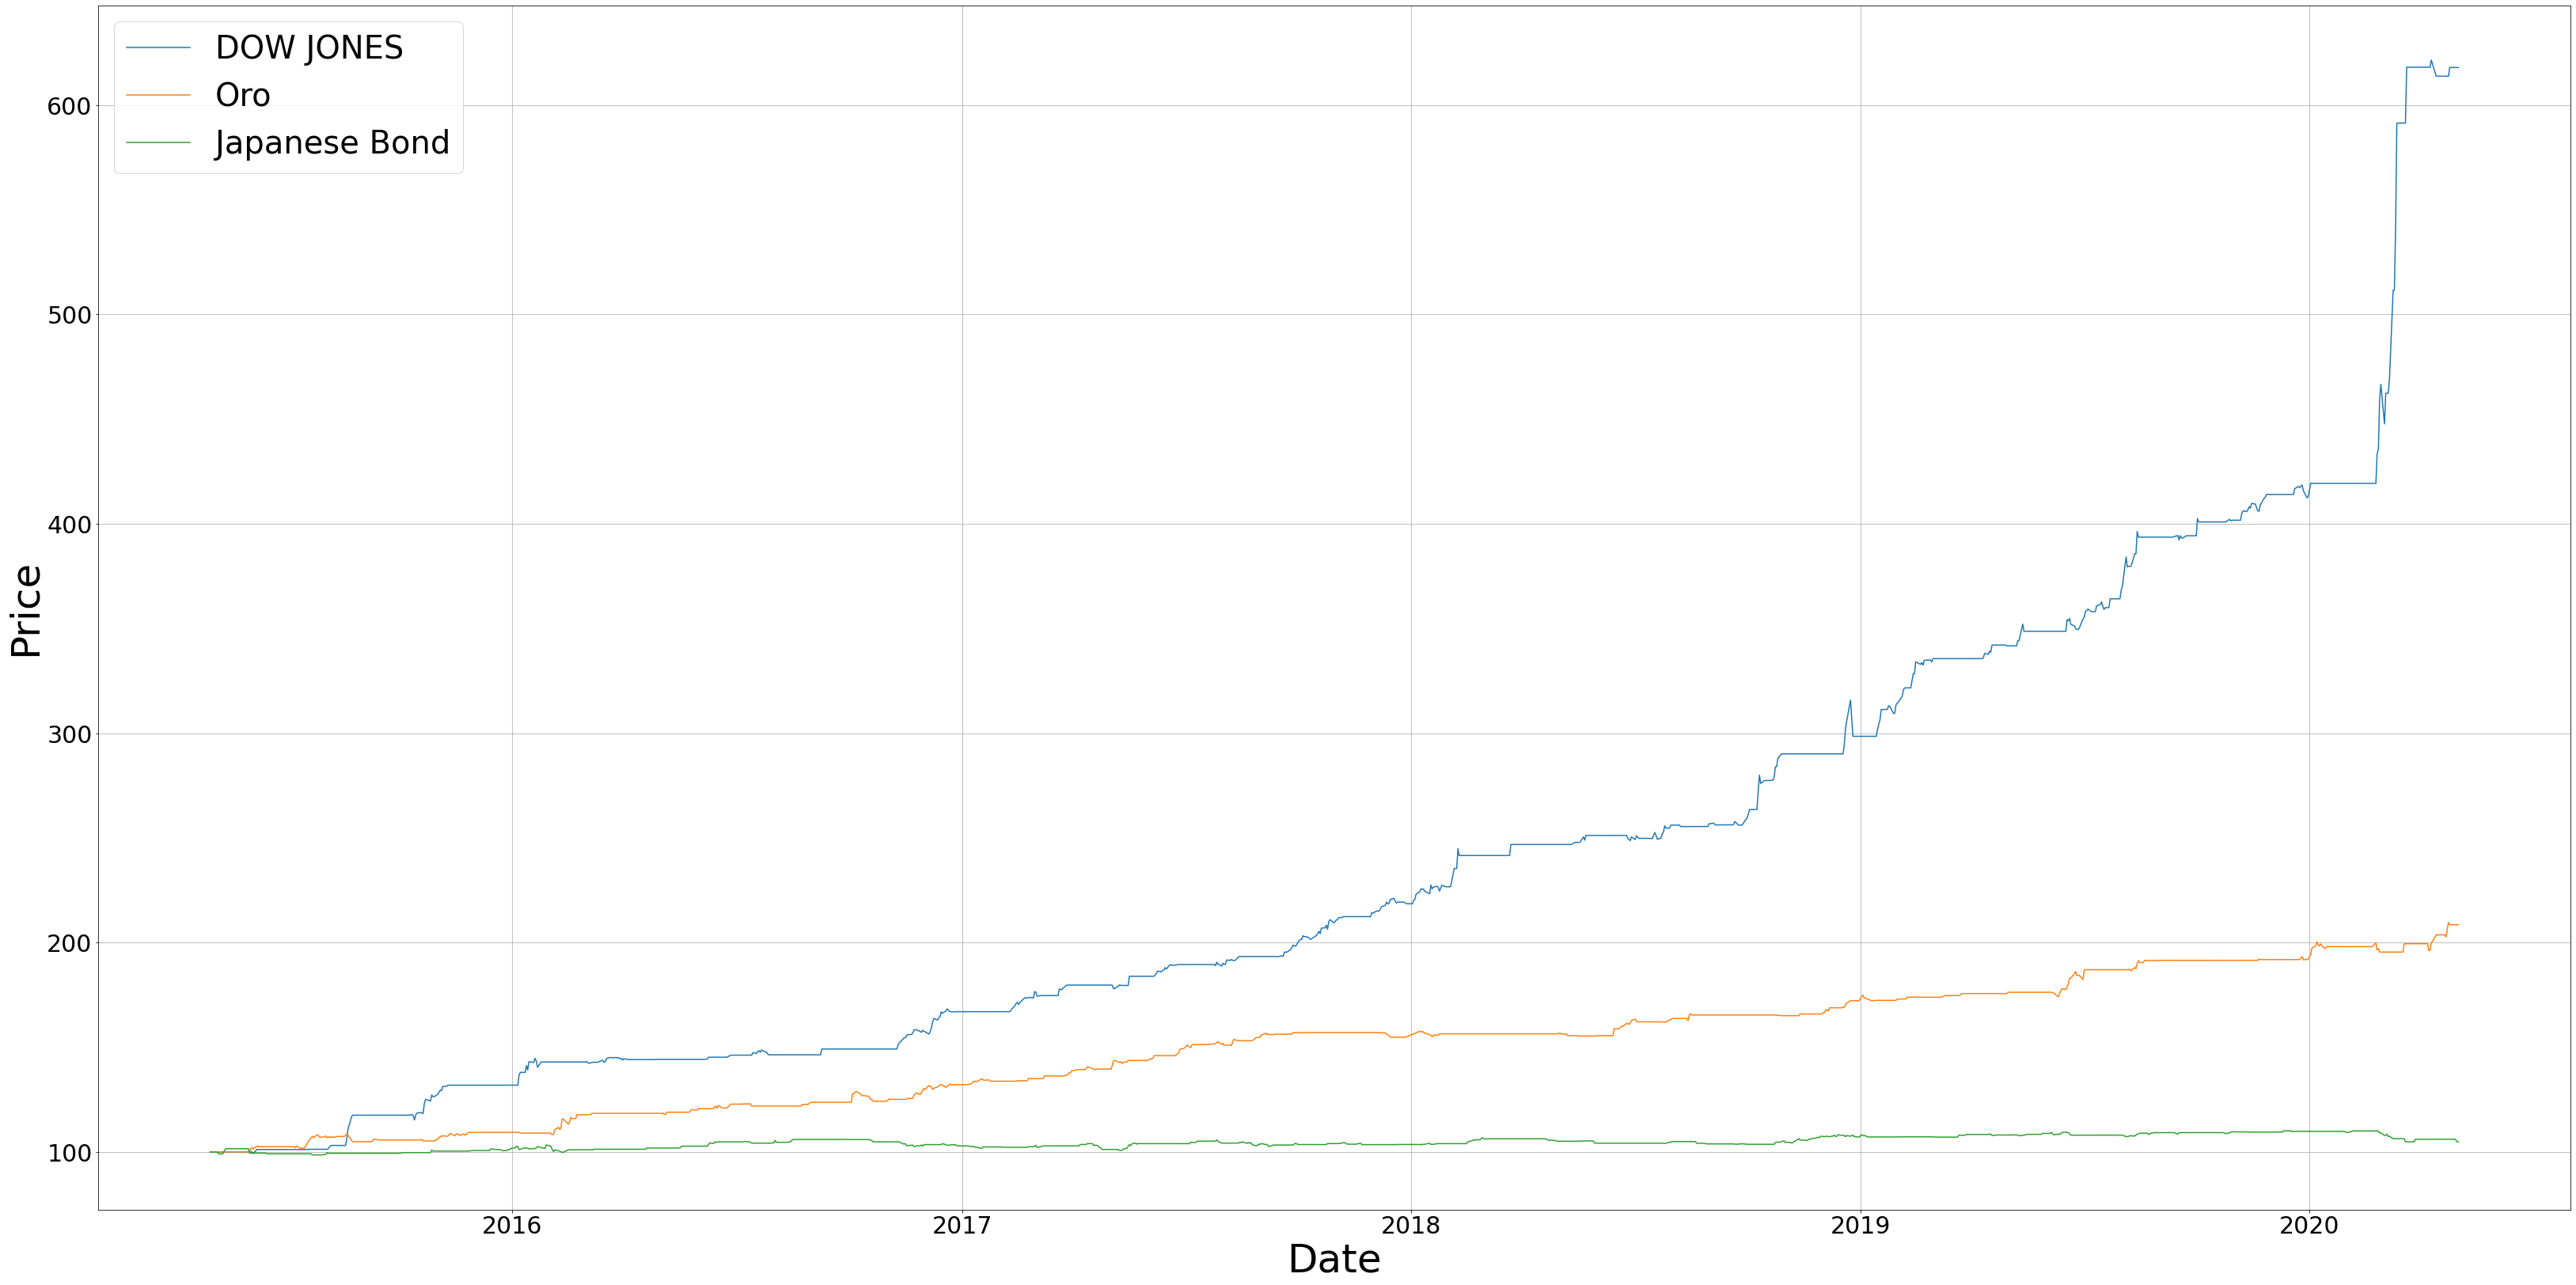

In [27]:
# Ploteo las series

fig = plt.figure(figsize=(56,28))
ax1 = plt.plot(Estrategia_Mean['Rev Mean_Renta Variable'])
ax1 = plt.plot(Estrategia_Mean['Rev Mean_Materia Prima'])
ax1 = plt.plot(Estrategia_Mean['Rev Mean_Renta Fija'])
ax1 = plt.xlabel("Date", fontsize=50)
x = plt.xticks(fontsize=30)
ax1 = plt.ylabel("Price", fontsize=50)
y = plt.yticks(fontsize=30)
ax1 = plt.legend(['DOW JONES', 'Oro', 'Japanese Bond'],prop={"size":40}, loc="upper left")
plt.grid(True)
plt.show()

In [28]:
Estrategia_Mean.to_csv('Estrategia_Mean')